In [9]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import numpy as np
import matplotlib.pyplot as plt
from core.monte_carlo_exotic import (
    monte_carlo_asian_geometric,
    monte_carlo_asian_arithmetic,
    asian_geometric_call_analytic
)

np.random.seed(42)


In [10]:
S0, K, T, r, sigma = 100, 100, 1, 0.05, 0.2
num_sim = 100_000
num_steps = 200

# Geometric (analitik ve MC)
price_geo_analytic = asian_geometric_call_analytic(S0, K, T, r, sigma)
price_geo_mc = monte_carlo_asian_geometric(S0, K, T, r, sigma, num_sim, num_steps)

# Arithmetic (yalnızca MC)
price_arith = monte_carlo_asian_arithmetic(S0, K, T, r, sigma, num_sim, num_steps)

print(f"Geometric (Analytic):  {price_geo_analytic:.4f}")
print(f"Geometric (MC):        {price_geo_mc:.4f}")
print(f"Arithmetic (MC):       {price_arith:.4f}")
print(f"Difference (Arith - Geo): {price_arith - price_geo_analytic:.4f}")


Geometric (Analytic):  5.5468
Geometric (MC):        5.5529
Arithmetic (MC):       5.7710
Difference (Arith - Geo): 0.2242


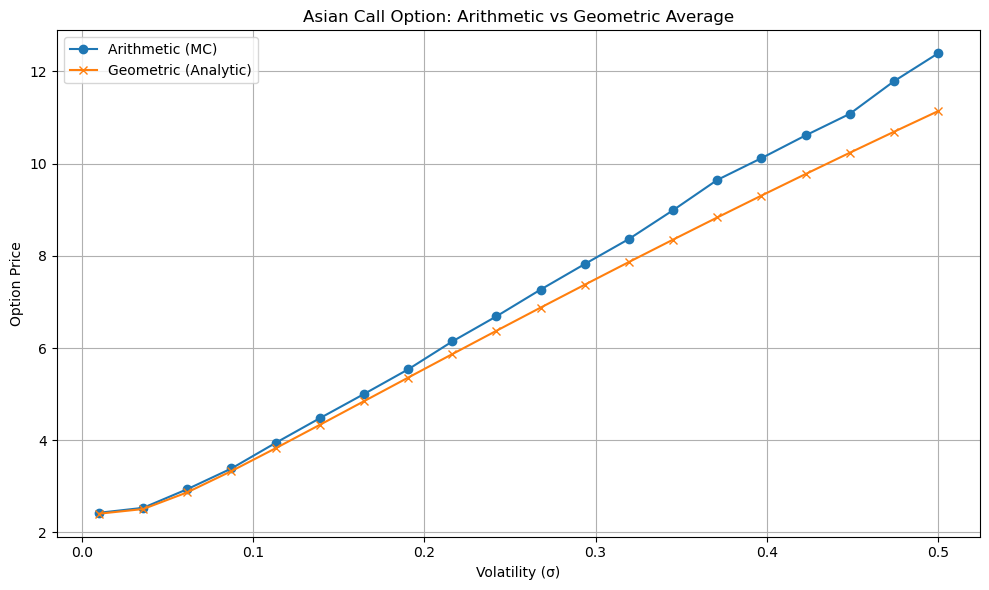

In [11]:
vols = np.linspace(0.01, 0.5, 20)
arith_prices = []
geo_prices = []

for v in vols:
    arith = monte_carlo_asian_arithmetic(S0, K, T, r, v, num_sim, num_steps)
    geo = asian_geometric_call_analytic(S0, K, T, r, v)
    arith_prices.append(arith)
    geo_prices.append(geo)

plt.figure(figsize=(10, 6))
plt.plot(vols, arith_prices, label="Arithmetic (MC)", marker='o')
plt.plot(vols, geo_prices, label="Geometric (Analytic)", marker='x')
plt.xlabel("Volatility (σ)")
plt.ylabel("Option Price")
plt.title("Asian Call Option: Arithmetic vs Geometric Average")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../assets/arithmetic_vs_geometric.png")
plt.show()


###  Arithmetic vs Geometric Asian Call Option

Asian options based on the **arithmetic average** cannot be priced analytically, while **geometric average** options have closed-form solutions.

This plot shows how the option prices diverge as volatility increases. The geometric average price acts as a **lower bound** for the arithmetic average price.

- **Monte Carlo Simulations** used for Arithmetic Pricing
- **Black-Scholes based formula** used for Geometric Pricing
